## SpaCy: Ejercicio Práctico

In [ ]:
!pip install watermark -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.6 MB/s eta 0:00:00


In [ ]:
!python -m spacy download es_core_news_lg -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 3.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Importación de librerías
from bs4 import BeautifulSoup
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
from collections import Counter
import spacy
import es_core_news_lg
from spacy import displacy

In [ ]:
# Descargar stopwords
nltk.download('stopwords')
stopwords_es = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# URL a scrapear
url = "https://www.infobae.com/salud/2025/04/01/una-mujer-volvio-a-hablar-despues-de-18-anos-gracias-a-un-implante-cerebral-con-ia/"
contenido = requests.get(url).text
soup = BeautifulSoup(contenido, "html.parser")

In [ ]:
# Elimina etiquetas innecesarias (scripts, estilos, enlaces)
for tag in soup(["a", "script", "style"]):
    tag.decompose()

In [ ]:
# Extrae y une el texto de los párrafos con clase 'paragraph'
parrafos = soup.find_all("p", class_="paragraph")
texto_completo = " ".join([p.get_text(separator=" ", strip=True) for p in parrafos])

In [ ]:
# Lista de palabras a eliminar
palabras_a_eliminar = ['así', 'aunque', 'sino', 'luego', 'pues', 'mientras', 'allí',
    'después', 'antes', 'porque', 'cuando', 'cómo', 'donde', 'ó', 'éste', 'fué',
    'á', 'si','más', 'día', 'tal', 'llegó', 'aquí', 'misma', 'mas', 'ésta', 'aquél',
    'mismo', 'p', 'iniciar', 'sesion', 'Infobae', 'Últimas', 'Noticias', 'REGISTRARME',
    'INICIAR', 'SESIÓN', 'sitio', 'bienvenido']
black_list = stopwords_es.union(palabras_a_eliminar)

In [ ]:
# Convertir texto a minúsculas
texto_completo = texto_completo.lower()

In [ ]:
# Elimina signos de puntuación y caracteres especiales
texto_completo = re.sub(r'[^\w\s]', '', texto_completo)

In [ ]:
# Divide el texto en palabras
lista_palabras = texto_completo.split()

In [ ]:
# Filtra palabras importantes
palabras_importantes = [palabra for palabra in lista_palabras if palabra not in black_list]

In [ ]:
# Reconstruye el texto limpio
texto_limpio = ' '.join(palabras_importantes)

In [ ]:
# Carga modelo de Spacy en español
nlp = es_core_news_lg.load()
doc = nlp(texto_limpio)

In [ ]:
# Extrae lemas sin stopwords
palabras_clave = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]

In [ ]:
# Etiquetado gramatical
print("Etiquetado gramatical:")
for token in doc:
    if not token.is_space:  # Evitamos los espacios
        print(f"'{token.text}' → {token.pos_} ({spacy.explain(token.pos_)})")

Etiquetado gramatical:
'ann' → PROPN (proper noun)
'mujer' → NOUN (noun)
'47' → NUM (numeral)
'años' → NOUN (noun)
'cuadriplejía' → PROPN (proper noun)
'logró' → VERB (verb)
'hablar' → VERB (verb)
'18' → NUM (numeral)
'años' → NOUN (noun)
'gracias' → NOUN (noun)
'nuevo' → ADJ (adjective)
'dispositivo' → NOUN (noun)
'últimos' → ADJ (adjective)
'avances' → NOUN (noun)
'inteligencia' → NOUN (noun)
'artificial' → ADJ (adjective)
'ia' → PROPN (proper noun)
'neuroprótesis' → NOUN (noun)
'compuesta' → ADJ (adjective)
'253' → NUM (numeral)
'electrodos' → NOUN (noun)
'implantada' → ADJ (adjective)
'directamente' → ADV (adverb)
'cerebro' → NOUN (noun)
'registró' → VERB (verb)
'actividad' → NOUN (noun)
'cerebral' → ADJ (adjective)
'envió' → VERB (verb)
'señales' → NOUN (noun)
'computadora' → ADJ (adjective)
'transformó' → VERB (verb)
'pensamientos' → NOUN (noun)
'palabras' → NOUN (noun)
'pronunciadas' → ADJ (adjective)
'voz' → NOUN (noun)
'idéntica' → ADJ (adjective)
'sufrir' → VERB (verb)
'acv' 

In [ ]:
# Análisis de dependencia sintáctica
print("Análisis de dependencias:")
for token in doc:
    if not token.is_space:
        print(f"'{token.text}' → {token.dep_} ({spacy.explain(token.dep_)})")

Análisis de dependencias:
'ann' → nsubj (nominal subject)
'mujer' → flat (flat multiword expression)
'47' → nummod (numeric modifier)
'años' → nmod (modifier of nominal)
'cuadriplejía' → flat (flat multiword expression)
'logró' → ccomp (clausal complement)
'hablar' → xcomp (open clausal complement)
'18' → nummod (numeric modifier)
'años' → obj (object)
'gracias' → case (case marking)
'nuevo' → amod (adjectival modifier)
'dispositivo' → obl (oblique nominal)
'últimos' → amod (adjectival modifier)
'avances' → nmod (modifier of nominal)
'inteligencia' → nmod (modifier of nominal)
'artificial' → amod (adjectival modifier)
'ia' → appos (appositional modifier)
'neuroprótesis' → amod (adjectival modifier)
'compuesta' → amod (adjectival modifier)
'253' → nummod (numeric modifier)
'electrodos' → nsubj (nominal subject)
'implantada' → amod (adjectival modifier)
'directamente' → advmod (adverbial modifier)
'cerebro' → obj (object)
'registró' → conj (conjunct)
'actividad' → obj (object)
'cerebral'

In [ ]:
# Contar frecuencia de palabras
frecuencia_palabras = Counter(palabras_clave)
palabras_mas_comunes = frecuencia_palabras.most_common(15)

In [ ]:
print("Palabras más frecuentes:")
for palabra, frecuencia in palabras_mas_comunes:
    print(f"- '{palabra}': {frecuencia}")

Palabras más frecuentes:
- 'voz': 10
- 'dispositivo': 6
- 'investigador': 6
- 'frase': 5
- 'algoritmo': 5
- 'ann': 4
- 'año': 4
- 'avance': 4
- 'cerebral': 4
- 'señal': 4
- 'palabra': 4
- 'estudio': 4
- 'lograr': 3
- 'inteligencia': 3
- 'artificial': 3


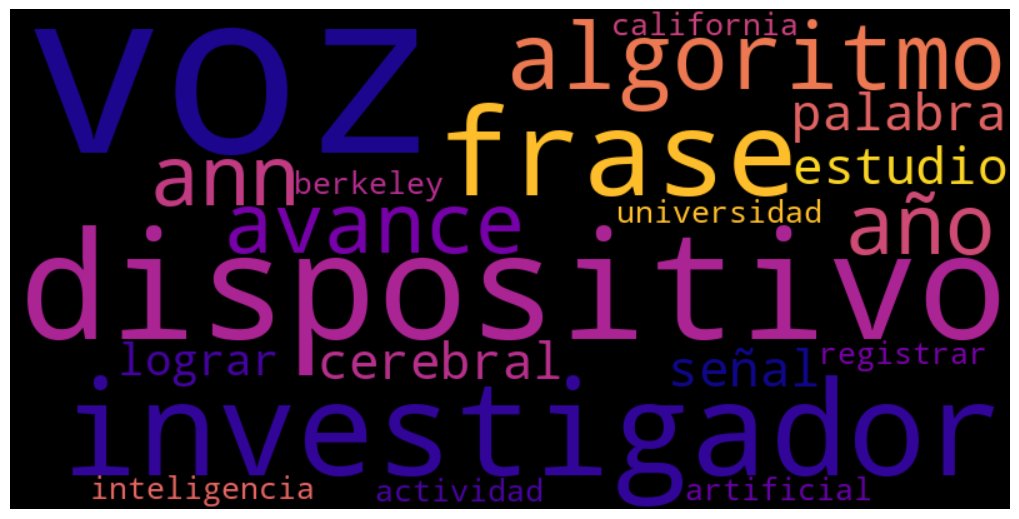

In [ ]:
# Genera y muestra una nube de palabras
wordcloud_generator = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='plasma',
    max_words=20,
    stopwords=None,
    collocations=False
).generate_from_frequencies(frecuencia_palabras)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_generator, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Análisis de dependencias con SpaCy
print("Análisis de dependencias (SpaCy):")
options = {
    "compact": True,  # Hacerlo más compacto
    "color": "black",  # Color del texto
    "bg": "#FAFAFA",  # Color de fondo
    "font": "Arial",  # Fuente
    "distance": 100,  # Distancia entre palabras
    "arrow_stroke": 2,  # Grosor de la flecha
    "arrow_width": 8  # Tamaño de la flecha
}

displacy.render(doc, style="dep", jupyter=True, options=options)

Análisis de dependencias (SpaCy):
